In [240]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import re
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob

#visulaization 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from mpl_toolkits.basemap import Basemap #for using basemap first we need to install it using - conda install basemap
from wordcloud import WordCloud, STOPWORDS

#Lemmatizer #nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer #this is not working
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.util import *
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\neha1\AppData\Roaming\nltk_data...


In [2]:
tweets = pd.read_csv("tweets_all.csv",encoding = "ISO-8859-1") 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 82: invalid start byte

In [3]:
tweets["text"].head()

0    Good morning. \r\n#njspots #toxictins #njshoot...
1    @DinaPugliese Good morning Dina :) Have a terr...
2      #good morning everyone. https://t.co/u6W1jI4tKz
3     @monieke71 @SomenHalder6 good morning my friends
4    Good morning Abuja,it breakfast time @pastry &...
Name: text, dtype: object

In [4]:
len(tweets["text"])

4811

In [5]:
tweets["text"].str.split(" ")[1][0]

'@DinaPugliese'

In [6]:
#now preprocessing the tweets to remove punctuations and urls and username starting with sign @
# Extracting usernames and creating addistion column name tweetos to save this data
tweets["tweetos"] = ""

#add tweetos first part
for i in range(len(tweets["text"])):
    try:
        tweets["tweetos"][i] = tweets["text"].str.split(" ")[i][0]
    except AttributeError:
        tweets["tweetos"][i] = "other"   
        
#preprocessing tweetos for sign @
for i in range(len(tweets["text"])):
    if tweets["tweetos"].str.contains("@")[i]==False:
            tweets["tweetos"][i]="others"
            
#preprocessing to remove urls
for i in range(len(tweets["text"])):
    tweets["text"][i] = " ".join([word for word in tweets['text'][i].split(" ") 
                                  if "http" not in word and "@" not in word and "<" not in word ])

In [38]:
tweets[["text","tweetos"]].head() # without add tweetos first part section

,text,tweetos
0,Good morning. \r\n#njspots #toxictins #njshoot...,others
1,Good morning Dina :) Have a terrific hump day!...,others
2,#good morning everyone.,others
3,good morning my friends,others
4,"Good morning Abuja,it breakfast time &amp; Eat...",others


In [7]:
tweets[["text","tweetos"]].head()

,text,tweetos
0,Good morning. \r\n#njspots #toxictins #njshoot...,others
1,Good morning Dina :) Have a terrific hump day!...,@DinaPugliese
2,#good morning everyone.,others
3,good morning my friends,@monieke71
4,"Good morning Abuja,it breakfast time &amp; Eat...",others


In [39]:
tweets["text"][1]  # without add tweetos first part section

'Good morning Dina :) Have a terrific hump day! :) Little snowy in Cochrane today.'

In [8]:
tweets["text"][1]

'Good morning Dina :) Have a terrific hump day! :) Little snowy in Cochrane today.'

In [9]:
# removing punatuations
tweets["text"] = tweets["text"].apply(lambda x : re.sub('[!@#$:).;,?&)]', '',x.lower()))
tweets["text"] = tweets["text"].apply(lambda x : re.sub("  "," ",x))

In [41]:
tweets["text"][1] # without add tweetos first part section

'good morning dina have a terrific hump day little snowy in cochrane today'

In [10]:
tweets["text"][1]  # both are giving same result as of now

'good morning dina have a terrific hump day little snowy in cochrane today'

In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 4811 non-null   int64  
 1   text                       4811 non-null   object 
 2   retweet_count              4811 non-null   int64  
 3   favorited                  4811 non-null   bool   
 4   truncated                  4811 non-null   bool   
 5   id_str                     4811 non-null   int64  
 6   in_reply_to_screen_name    1288 non-null   object 
 7   source                     4811 non-null   object 
 8   retweeted                  4811 non-null   bool   
 9   created_at                 4811 non-null   object 
 10  in_reply_to_status_id_str  660 non-null    float64
 11  in_reply_to_user_id_str    1288 non-null   float64
 12  lang                       4811 non-null   object 
 13  listed_count               4811 non-null   int64

In [14]:
#data visulaization using word count on column text and country

def wordcloud(tweet,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color = "white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure(figsize=(10,5),facecolor = "k")
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Maximum words Wordcloud")

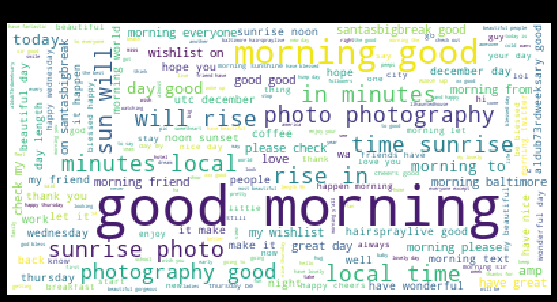

In [15]:
wordcloud(tweets,"text")

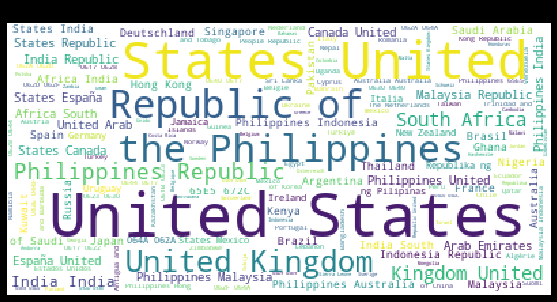

In [16]:
wordcloud(tweets,"country")

In [17]:
tweets[["country"]].groupby("country").head(5)

,country
0,United States
1,Canada
2,United States
3,France
4,Nigeria
...,...
4768,Sverige
4769,Reino Unido
4780,Royaume du Maroc
4783,Ceská republika


In [18]:
tweets["country"].value_counts()#total rows are 4811 but unique countries are 254 but it seems like some are repeating,therefor 

United States                                                       1597
Republic of the Philippines                                          644
United Kingdom                                                       390
India                                                                347
South Africa                                                         199
                                                                    ... 
<U+30CB><U+30E5><U+30FC><U+30B8><U+30FC><U+30E9><U+30F3><U+30C9>       1
<U+0395><U+03BB><U+03BB><U+03AC><U+03C2>                               1
Lao People's Democratic Republic                                       1
Mayotte                                                                1
Saint Martin                                                           1
Name: country, Length: 254, dtype: int64

In [19]:
tweets["country"]=tweets["country"].apply(lambda x : x.lower())

In [20]:
tweets["country"].replace("states united","united states",inplace= True)
tweets["country"].replace("united states","usa",inplace= True)
tweets["country"].replace("united kingdom", "uk",inplace=True)
tweets["country"].replace("republic philippines", "philippines republic",inplace = True)
tweets["country"].replace("republic of the philippines", "philippines republic",inplace = True)

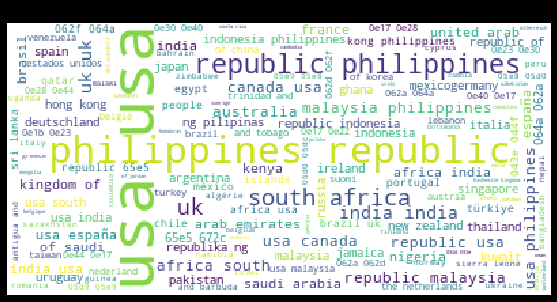

In [21]:
wordcloud(tweets,"country")

In [22]:
tweets[["country"]].groupby("country").head(5)

,country
0,usa
1,canada
2,usa
3,france
4,nigeria
...,...
4768,sverige
4769,reino unido
4780,royaume du maroc
4783,ceská republika


In [23]:
tweets["country"].value_counts()#total rows are 4811 but unique countries are 254 but it seems like some are repeating,therefor 

usa                                         1597
philippines republic                         644
uk                                           390
india                                        347
south africa                                 199
                                            ... 
<u+0395><u+03bb><u+03bb><u+03ac><u+03c2>       1
turks and caicos islands                       1
north korea                                    1
cameroon                                       1
lao people's democratic republic               1
Name: country, Length: 254, dtype: int64

In [24]:
tweets["source"][2]

'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>'

In [25]:
tweets.head(2)

,Unnamed: 0,text,retweet_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,...,full_name,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url,tweetos
0,7,good morning \r\nnjspots toxictins njshooterz ...,0,False,False,806435522684063744,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,Wed Dec 07 09:49:46 +0000 2016,...,"Mercerville, NJ",NaN,NaN,40.227928,-74.703982,40.236494,-74.717857,http://fb.me/1vMVgkYg7,https://t.co/q7R11FO1eU,others
1,15,good morning dina have a terrific hump day lit...,0,False,False,806435535132721152,DinaPugliese,"<a href=""http://twitter.com/download/android"" ...",False,Wed Dec 07 09:49:49 +0000 2016,...,"Cochrane, Ontario",NaN,NaN,49.145331,-81.073921,NaN,NaN,NaN,NaN,@DinaPugliese


In [26]:
tweets["source"]

0       <a href="http://instagram.com" rel="nofollow">...
1       <a href="http://twitter.com/download/android" ...
2       <a href="http://twitter.com/download/android" ...
3       <a href="http://twitter.com/download/android" ...
4       <a href="http://twitter.com" rel="nofollow">Tw...
                              ...                        
4806    <a href="http://www.twitter.com/photoschedule"...
4807    <a href="http://www.twitter.com/photoschedule"...
4808    <a href="http://twitter.com/download/iphone" r...
4809    <a href="http://twitter.com/download/iphone" r...
4810    <a href="http://enotty.dk/" rel="nofollow">cip...
Name: source, Length: 4811, dtype: object

In [27]:
pd.set_option('display.max_colwidth', -1) # to view the full text in pandas

In [28]:
tweets["source"]

0       <a href="http://instagram.com" rel="nofollow">Instagram</a>                             
1       <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    
2       <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    
3       <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    
4       <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      
                                       ...                                                      
4806    <a href="http://www.twitter.com/photoschedule" rel="nofollow">Photo Schedule Tweeter</a>
4807    <a href="http://www.twitter.com/photoschedule" rel="nofollow">Photo Schedule Tweeter</a>
4808    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      
4809    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      
4810    <a href="http://enotty

In [120]:
tweets["source"]=tweets["source"].str.extract(r'">\s*([^\.]*)\s*\</a>',expand=False) #This was my method for getting tweet source
#device . but now will try from the tutorial.

In [29]:
tweets[["source","location","country"]]

,source,location,country
0,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>","New Jersey, USA",usa
1,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Cochrane,canada
2,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,usa
3,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",France,france
4,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","4 Ubiaja Crescent, Garki ll, Abuja. 08079699171.",nigeria
...,...,...,...
4806,"<a href=""http://www.twitter.com/photoschedule"" rel=""nofollow"">Photo Schedule Tweeter</a>",Finland,argentina
4807,"<a href=""http://www.twitter.com/photoschedule"" rel=""nofollow"">Photo Schedule Tweeter</a>",Finland,chile
4808,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Colchester, England",uk
4809,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",West Midlands,uk


In [30]:
tweets["source_new"]=""

In [54]:
for i in range(len(tweets["source"])):
    m = re.search('">\s*([^\.]*)\s*\</a>', tweets['source'][i])
    m = re.search('(?)(.*)', tweets['source'][i])#this is giving error
    #print(m)      
    try:
        tweets["source_new"]=m.group(0)
    except AttributeError:
        tweets["source_new"] = tweets["source"][i]
tweets["source_new"] = tweets["source_new"].str.replace(""," ",case=False)
#this whole code is not giving right answer
#below is the result

In [55]:
tweets["source_new"]

0        " > c i p n i < / a > 
1        " > c i p n i < / a > 
2        " > c i p n i < / a > 
3        " > c i p n i < / a > 
4        " > c i p n i < / a > 
                 ...           
4806     " > c i p n i < / a > 
4807     " > c i p n i < / a > 
4808     " > c i p n i < / a > 
4809     " > c i p n i < / a > 
4810     " > c i p n i < / a > 
Name: source_new, Length: 4811, dtype: object

In [58]:
tweets["source_new"]=tweets["source"].str.extract(r'">\s*([^\.]*)\s*\</a>',expand=False)

tweets.head()

,Unnamed: 0,text,retweet_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,...,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url,tweetos,source_new
0,7,good morning \r\nnjspots toxictins njshooterz njisntboring njhn wildnewjersey,0,False,False,806435522684063744,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",False,Wed Dec 07 09:49:46 +0000 2016,...,NaN,NaN,40.227928,-74.703982,40.236494,-74.717857,http://fb.me/1vMVgkYg7,https://t.co/q7R11FO1eU,others,Instagram
1,15,good morning dina have a terrific hump day little snowy in cochrane today,0,False,False,806435535132721152,DinaPugliese,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,Wed Dec 07 09:49:49 +0000 2016,...,NaN,NaN,49.145331,-81.073921,NaN,NaN,NaN,NaN,@DinaPugliese,Twitter for Android
2,18,good morning everyone,0,False,False,806435538928594944,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,Wed Dec 07 09:49:49 +0000 2016,...,NaN,NaN,39.870397,-85.996819,NaN,NaN,NaN,NaN,others,Twitter for Android
3,21,good morning my friends,0,False,False,806435547338178560,monieke71,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,Wed Dec 07 09:49:51 +0000 2016,...,NaN,NaN,48.660176,2.576654,NaN,NaN,NaN,NaN,@monieke71,Twitter for Android
4,33,good morning abujait breakfast time amp eatery corner,0,False,False,806435582482247682,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",False,Wed Dec 07 09:50:00 +0000 2016,...,NaN,NaN,8.942483,7.253046,NaN,NaN,NaN,NaN,others,Twitter Web Client


In [96]:
tweets["source_new"].unique()

array(['Instagram', 'Twitter for Android', 'Twitter Web Client',
       'Twitter for iPhone', 'Photo Schedule Tweeter',
       'Tweetbot for i<U+039F>S', 'Twitter for iPad', 'cipni',
       'Talon (Plus)', 'Foursquare', 'Twitter for Windows Phone', 'iOS',
       'Twitter Dashboard for iPhone', 'Put your button on any page! ',
       'Fenix for Android', 'Hootsuite', 'Vitweet',
       'Twitter for Android Tablets', nan, 'Tweetlogix',
       'CUBE Live Feed App', 'Path', 'Twitter for BlackBerry®',
       'TweetCaster for Android', 'Twitter for BlackBerry',
       'Raspberry Pi Bot Notifier', 'PVLng', 'Echofon',
       'Tweetbot for Mac', 'Chicmi'], dtype=object)

In [69]:
#No. of tweets from source
tweets.groupby("source_new").sum() #sum() karne se jitne bhi integer ya float vlaues wale columns the un sab ka calculation ho 
#gaya h

,Unnamed: 0,retweet_count,favorited,truncated,id_str,retweeted,in_reply_to_status_id_str,in_reply_to_user_id_str,listed_count,verified,...,favourites_count,protected,utc_offset,friends_count,place_name,place_id,place_lat,place_lon,lat,lon
source_new,,,,,,,,,,,,,,,,,,,,,
CUBE Live Feed App,59885.0,0.0,0.0,0.0,8.065728e+17,0.0,0.000000e+00,0.000000e+00,111.0,0.0,...,0.0,0.0,-28800.0,795.0,0.0,0.0,-36.737158,144.282325,-36.765730,144.278523
Chicmi,146824.0,0.0,0.0,0.0,8.067856e+17,0.0,0.000000e+00,0.000000e+00,44.0,0.0,...,12618.0,0.0,0.0,1550.0,0.0,0.0,51.514480,-0.092911,51.514125,-0.093689
Echofon,140656.0,0.0,0.0,0.0,8.067693e+17,0.0,0.000000e+00,0.000000e+00,64.0,0.0,...,91.0,0.0,3600.0,4790.0,0.0,0.0,4.989648,7.894755,0.000000,0.000000
Fenix for Android,26924.0,0.0,0.0,0.0,8.064821e+17,0.0,0.000000e+00,0.000000e+00,35.0,0.0,...,46592.0,0.0,-21600.0,908.0,0.0,0.0,29.838495,-95.446487,29.712850,-95.516829
Foursquare,16967839.0,0.0,0.0,0.0,2.903715e+19,0.0,0.000000e+00,0.000000e+00,3424.0,0.0,...,189909.0,0.0,-46800.0,69095.0,0.0,0.0,885.429908,31.558702,886.062459,31.231193
Hootsuite,163965.0,0.0,0.0,0.0,1.613240e+18,0.0,0.000000e+00,0.000000e+00,294.0,0.0,...,1971.0,0.0,-18000.0,11609.0,0.0,0.0,86.404354,-81.821195,86.454524,-81.825727
Instagram,235385063.0,0.0,0.0,0.0,4.533084e+20,0.0,0.000000e+00,0.000000e+00,18694.0,3.0,...,853676.0,0.0,-2448000.0,427191.0,0.0,0.0,13767.419796,172.960475,13786.358730,188.387063
PVLng,134453.0,0.0,0.0,0.0,8.067557e+17,0.0,0.000000e+00,0.000000e+00,0.0,0.0,...,1.0,0.0,3600.0,25.0,0.0,0.0,51.509828,12.143982,51.548203,12.131052
Path,1473978.0,0.0,0.0,0.0,1.290659e+19,0.0,0.000000e+00,0.000000e+00,50.0,0.0,...,3694.0,0.0,46800.0,8839.0,0.0,0.0,-44.210707,1638.738220,-44.297890,1638.746510


In [74]:
tweets_by_type = tweets.groupby("source_new")["followers_count"].sum()

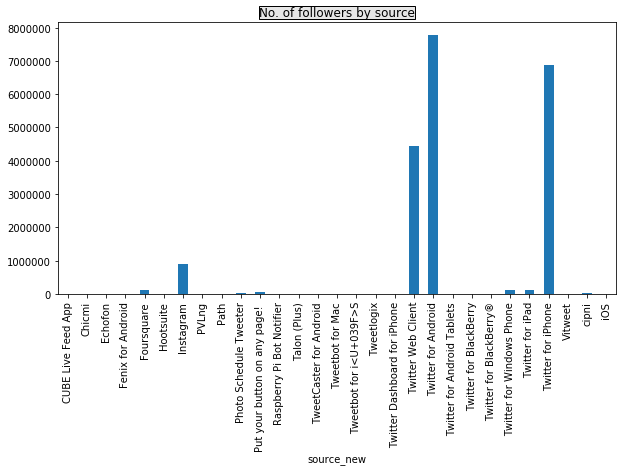

In [91]:
plt.title("No. of followers by source",bbox = {'facecolor':'0.9',"pad":0})
tweets_by_type.transpose().plot(kind='bar',figsize=(10,5))

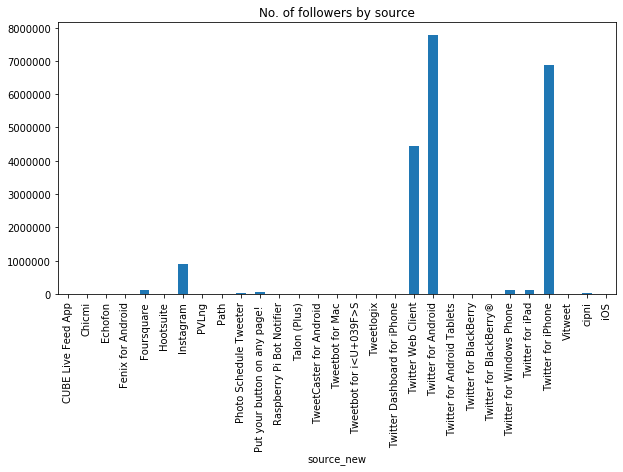

In [87]:
plt.title("No. of followers by source")#,bbox = {'facecolor':'0.8',"pad"=0})
tweets_by_type.plot(kind='bar',figsize=(10,5))

In [97]:
#now generalizing the source of tweets in most common platform for tweets
tweets["source_new2"]=""
for i in range(len(tweets["source_new"])):
    if tweets["source_new"][i] not in ['Twitter for Android','Instagram','Twitter Web Client','Twitter for iPhone']:
        tweets["source_new2"][i] = "Others"
    else:
        tweets["source_new2"][i] = tweets["source_new"][i]
        

In [98]:
tweets["source_new2"].unique()

array(['Instagram', 'Twitter for Android', 'Twitter Web Client',
       'Twitter for iPhone', 'Others'], dtype=object)

In [103]:
tweets_by_type_pie = tweets.groupby("source_new2")["followers_count"].sum()
tweets_by_type_pie

source_new2
Instagram              913393 
Others                 614578 
Twitter Web Client     4429975
Twitter for Android    7770606
Twitter for iPhone     6862058
Name: followers_count, dtype: int64

In [106]:
tweets_by_type_pie.replace("",inplace=True)

In [107]:
tweets_by_type_pie

source_new2
Instagram              913393 
Others                 614578 
Twitter Web Client     4429975
Twitter for Android    7770606
Twitter for iPhone     6862058
Name: followers_count, dtype: int64

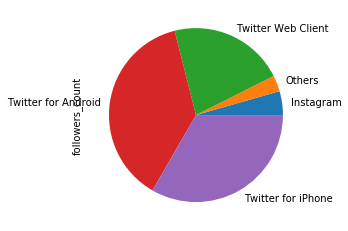

In [110]:
tweets_by_type_pie.plot(kind = 'pie')# originanlly it is like this

Text(0, 0.5, '')

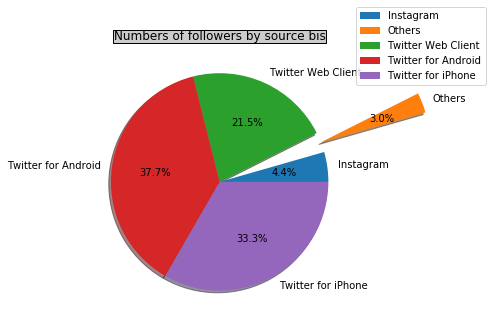

In [154]:
#explode=(1,0,0,0) ValueError: 'explode' must be of length 'x'
explode=(0,1,0,0,0)
tweets_by_type_pie.transpose().plot(kind = 'pie',figsize=(10,5),autopct="%1.1f%%",shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1,1),loc=6,borderaxespad=0.)
plt.title("Numbers of followers by source bis",bbox={'facecolor' : "0.8",'pad':0.4})
plt.ylabel("")

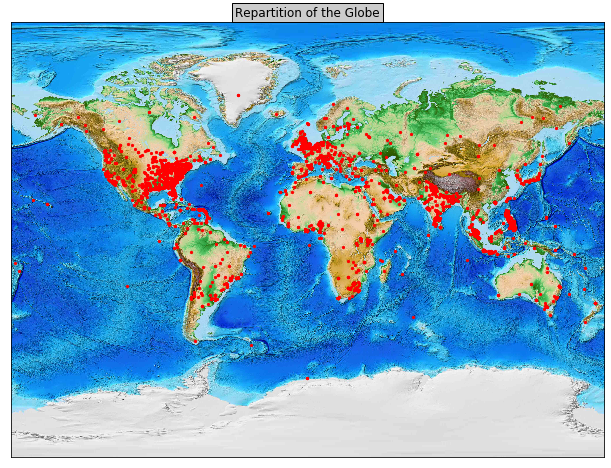

In [345]:
# Now pointing tweets across globe with the help of latitute and longitute
plt.figure(figsize = (15,8))
m=Basemap(projection="mill",resolution=None,llcrnrlat=-90,llcrnrlon=-180,urcrnrlat=90,urcrnrlon=180)
m.etopo()
xpt,ypt = m(np.array(tweets["place_lon"]),np.array(tweets["place_lat"]))
lon,lat = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,"ro",markersize=np.sqrt(5))
plt.title("Repartition of the Globe",bbox = {"facecolor":".8",'pad':3})
plt.show()

In [177]:
tweets["tweet_sentiment"]=''

In [186]:
#now doing the sentiment analysis on the tweets
#this is my version of doing sentiment analysis using TextBlob but this not working here because majority of the tweets are 
# for "Good Morning" verse, So they are most likly to be positive. Therefore my result of column tweets["tweet_sentiment"] is 
#only positive

#Now I will try lemmetize approch for sentiment analysis
def get_sentiment(tweets,col):
    #try:
    for tweet_text in range(len(tweets[col])):
            parsed_tweets ={}
            t=tweets[col][tweet_text]
            s=get_tweet_sentiment(t)
            tweets["tweet_sentiment"]=s
            
def get_tweet_sentiment(t):
    analysis = TextBlob(t)
    if analysis.sentiment.polarity==0:
        return "Neutral"
    elif analysis.sentiment.polarity>0:
        return "Positive"
    else:
        return "Negative"

In [187]:
get_sentiment(tweets,"text")

In [192]:
tweets["tweet_sentiment"].unique()

array(['Positive'], dtype=object)

In [193]:
tweets

,Unnamed: 0,text,retweet_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,...,place_lat,place_lon,lat,lon,expanded_url,url,tweetos,source_new,source_new2,tweet_sentiment
0,7,good morning \r\nnjspots toxictins njshooterz njisntboring njhn wildnewjersey,0,False,False,806435522684063744,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",False,Wed Dec 07 09:49:46 +0000 2016,...,40.227928,-74.703982,40.236494,-74.717857,http://fb.me/1vMVgkYg7,https://t.co/q7R11FO1eU,others,Instagram,Instagram,Positive
1,15,good morning dina have a terrific hump day little snowy in cochrane today,0,False,False,806435535132721152,DinaPugliese,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,Wed Dec 07 09:49:49 +0000 2016,...,49.145331,-81.073921,NaN,NaN,NaN,NaN,@DinaPugliese,Twitter for Android,Twitter for Android,Positive
2,18,good morning everyone,0,False,False,806435538928594944,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,Wed Dec 07 09:49:49 +0000 2016,...,39.870397,-85.996819,NaN,NaN,NaN,NaN,others,Twitter for Android,Twitter for Android,Positive
3,21,good morning my friends,0,False,False,806435547338178560,monieke71,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,Wed Dec 07 09:49:51 +0000 2016,...,48.660176,2.576654,NaN,NaN,NaN,NaN,@monieke71,Twitter for Android,Twitter for Android,Positive
4,33,good morning abujait breakfast time amp eatery corner,0,False,False,806435582482247682,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",False,Wed Dec 07 09:50:00 +0000 2016,...,8.942483,7.253046,NaN,NaN,NaN,NaN,others,Twitter Web Client,Twitter Web Client,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,149023,good morning argentina sun will rise in 30 minutes (local time 0625 sunrise photo photography [08122016],0,False,False,806791688576303105,NaN,"<a href=""http://www.twitter.com/photoschedule"" rel=""nofollow"">Photo Schedule Tweeter</a>",False,Thu Dec 08 09:25:02 +0000 2016,...,-24.207438,-65.316106,-24.183330,-65.300000,NaN,NaN,others,Photo Schedule Tweeter,Others,Positive
4807,149027,good morning santiago sun will rise in 30 minutes (local time 0625 sunrise photo photography [08122016],0,False,False,806791697845796864,NaN,"<a href=""http://www.twitter.com/photoschedule"" rel=""nofollow"">Photo Schedule Tweeter</a>",False,Thu Dec 08 09:25:04 +0000 2016,...,-33.452162,-70.659616,-33.450000,-70.666670,NaN,NaN,others,Photo Schedule Tweeter,Others,Positive
4808,149043,good morning world bit of christmasshopping today in colchester seeing my pals in for some new fashion model realitytv,0,False,False,806791722223083521,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,Thu Dec 08 09:25:10 +0000 2016,...,51.888702,0.898891,NaN,NaN,NaN,NaN,others,Twitter for iPhone,Twitter for iPhone,Positive
4809,149069,good morning white watch pleased to see you back on duty,0,False,False,806791785468940288,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,Thu Dec 08 09:25:25 +0000 2016,...,52.493967,-1.890640,NaN,NaN,https://www.instagram.com/p/BNuAAGfgHsd/,https://t.co/Yc2zGuJiTA,others,Twitter for iPhone,Twitter for iPhone,Positive


In [276]:
tweets["text_lem"] = [" ".join([WordNetLemmatizer().lemmatize(re.sub("[^A-Za-z]"," ",line)) for line in lines]).strip() 
                      for lines in tweets["text"]]

In [277]:
tweets["text_lem"]

0       g o o d   m o r n i n g       n j s p o t s   t o x i c t i n s   n j s h o o t e r z   n j i s n t b o r i n g   n j h n   w i l d n e w j e r s e y                                                                                      
1       g o o d   m o r n i n g   d i n a   h a v e   a   t e r r i f i c   h u m p   d a y   l i t t l e   s n o w y   i n   c o c h r a n e   t o d a y                                                                                          
2       g o o d   m o r n i n g   e v e r y o n e                                                                                                                                                                                                  
3       g o o d   m o r n i n g   m y   f r i e n d s                                                                                                                                                                                              
4       g o o d   m o r 

In [278]:
tweets["text_lem"][1]

'g o o d   m o r n i n g   d i n a   h a v e   a   t e r r i f i c   h u m p   d a y   l i t t l e   s n o w y   i n   c o c h r a n e   t o d a y'

In [279]:
tweets["text_lem"][1][0]

'g'

In [280]:
tweets

,Unnamed: 0,text,retweet_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,...,source_new2,tweet_sentiment,text_lem,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_positive,sentiment_type,sentiment,sentiment_pos
0,7,good morning \r\nnjspots toxictins njshooterz njisntboring njhn wildnewjersey,0,False,False,806435522684063744,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",False,Wed Dec 07 09:49:46 +0000 2016,...,Instagram,Positive,g o o d m o r n i n g n j s p o t s t o x i c t i n s n j s h o o t e r z n j i s n t b o r i n g n j h n w i l d n e w j e r s e y,0.4404,0.707,0.0,0.0,POSITIVE,NaN,0.293
1,15,good morning dina have a terrific hump day little snowy in cochrane today,0,False,False,806435535132721152,DinaPugliese,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,Wed Dec 07 09:49:49 +0000 2016,...,Twitter for Android,Positive,g o o d m o r n i n g d i n a h a v e a t e r r i f i c h u m p d a y l i t t l e s n o w y i n c o c h r a n e t o d a y,0.7184,0.625,0.0,0.0,POSITIVE,NaN,0.375
2,18,good morning everyone,0,False,False,806435538928594944,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,Wed Dec 07 09:49:49 +0000 2016,...,Twitter for Android,Positive,g o o d m o r n i n g e v e r y o n e,0.4404,0.408,0.0,0.0,POSITIVE,NaN,0.592
3,21,good morning my friends,0,False,False,806435547338178560,monieke71,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,Wed Dec 07 09:49:51 +0000 2016,...,Twitter for Android,Positive,g o o d m o r n i n g m y f r i e n d s,0.7184,0.250,0.0,0.0,POSITIVE,NaN,0.750
4,33,good morning abujait breakfast time amp eatery corner,0,False,False,806435582482247682,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",False,Wed Dec 07 09:50:00 +0000 2016,...,Twitter Web Client,Positive,g o o d m o r n i n g a b u j a i t b r e a k f a s t t i m e a m p e a t e r y c o r n e r,0.4404,0.707,0.0,0.0,POSITIVE,NaN,0.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,149023,good morning argentina sun will rise in 30 minutes (local time 0625 sunrise photo photography [08122016],0,False,False,806791688576303105,NaN,"<a href=""http://www.twitter.com/photoschedule"" rel=""nofollow"">Photo Schedule Tweeter</a>",False,Thu Dec 08 09:25:02 +0000 2016,...,Others,Positive,g o o d m o r n i n g a r g e n t i n a s u n w i l l r i s e i n m i n u t e s l o c a l t i m e s u n r i s e p h o t o p h o t o g r a p h y,0.4404,0.805,0.0,0.0,POSITIVE,NaN,0.195
4807,149027,good morning santiago sun will rise in 30 minutes (local time 0625 sunrise photo photography [08122016],0,False,False,806791697845796864,NaN,"<a href=""http://www.twitter.com/photoschedule"" rel=""nofollow"">Photo Schedule Tweeter</a>",False,Thu Dec 08 09:25:04 +0000 2016,...,Others,Positive,g o o d m o r n i n g s a n t i a g o s u n w i l l r i s e i n m i n u t e s l o c a l t i m e s u n r i s e p h o t o p h o t o g r a p h y,0.4404,0.805,0.0,0.0,POSITIVE,NaN,0.195
4808,149043,good morning world bit of christmasshopping today in colchester seeing my pals in for some new fashion model realitytv,0,False,False,806791722223083521,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,Thu Dec 08 09:25:10 +0000 2016,...,Twitter for iPhone,Positive,g o o d m o r n i n g w o r l d b i t o f c h r i s t m a s s h o p p i n g t o d a y i n c o l c h e s t e r s e e i n g m y p a l s i n f o r s o m e n e w f a s h i o n m o d e l r e a l i t y t v,0.4404,0.861,0.0,0.0,POSITIVE,NaN,0.139
4809,149069,good morning white watch pleased to see you back on duty,0,False,False,806791785468940288,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,Thu Dec 08 09:25:25 +0000 2016,...,Twitter 

In [291]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)

In [292]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=10000,
                min_df=10, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [293]:
X = vectorizer.fit_transform(tweets["text_lem"].str.upper())

In [302]:
X

<4811x191 sparse matrix of type '<class 'numpy.float64'>'
	with 8386 stored elements in Compressed Sparse Row format>

In [303]:
sid = SentimentIntensityAnalyzer()

In [304]:
tweets["sentiment_compound_polarity"] = tweets["text_lem"].apply(lambda x : sid.polarity_scores(x)["compound"] )

In [305]:
tweets["sentiment_compound_polarity"]

0       0.4404
1       0.7184
2       0.4404
3       0.7184
4       0.4404
         ...  
4806    0.4404
4807    0.4404
4808    0.4404
4809    0.7003
4810    0.4404
Name: sentiment_compound_polarity, Length: 4811, dtype: float64

In [306]:
tweets["sentiment_neutral"] = tweets["text_lem"].apply(lambda x:sid.polarity_scores(x)["neu"])
tweets["sentiment_neutral"]

0       0.707
1       0.625
2       0.408
3       0.250
4       0.707
        ...  
4806    0.805
4807    0.805
4808    0.861
4809    0.608
4810    0.775
Name: sentiment_neutral, Length: 4811, dtype: float64

In [307]:
tweets["sentiment_negative"] = tweets["text_lem"].apply(lambda x : sid.polarity_scores(x)["neg"])
tweets["sentiment_negative"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4806    0.0
4807    0.0
4808    0.0
4809    0.0
4810    0.0
Name: sentiment_negative, Length: 4811, dtype: float64

In [308]:
tweets["sentiment_positive"] = tweets["text_lem"].apply(lambda x : sid.polarity_scores(x)["pos"])
tweets["sentiment_positive"]

0       0.293
1       0.375
2       0.592
3       0.750
4       0.293
        ...  
4806    0.195
4807    0.195
4808    0.139
4809    0.392
4810    0.225
Name: sentiment_positive, Length: 4811, dtype: float64

In [311]:
tweets["sentiment_type"]=''

In [321]:
#df.loc[first,second]->first attribute is for column and second attribute for column::So this gives the desired cell like result
tweets.loc[tweets["sentiment_compound_polarity"]==0,'sentiment_type']="Neutral"
tweets.loc[tweets["sentiment_compound_polarity"]>0,'sentiment_type']='Positive'
tweets.loc[tweets["sentiment_compound_polarity"]<0,"sentiment_type"]="Negative"

In [337]:
tweets_sentiment = tweets.groupby(["sentiment_type"])["sentiment_neutral"].count()
tweets_sentiment

sentiment_type
Negative    89  
Neutral     62  
Positive    4660
Name: sentiment_neutral, dtype: int64

In [338]:
type(tweets_sentiment)

pandas.core.series.Series

In [340]:
tweets_sentiment.rename("",inplace=True)

sentiment_type
Negative    89  
Neutral     62  
Positive    4660
Name: , dtype: int64

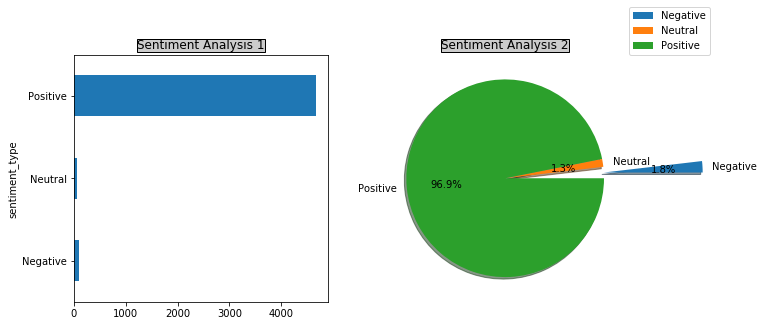

In [341]:
explode=(1,0,0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind="barh",figsize=(10,10))
plt.title("Sentiment Analysis 1",bbox = {'facecolor':"0.8","pad":0})
plt.subplot(222)
tweets_sentiment.plot(kind="pie",figsize=(10,10), shadow=True,autopct = "%1.1f%%",explode=explode)
plt.legend(bbox_to_anchor=(1,1),loc = 3,borderaxespad=0.)
plt.title("Sentiment Analysis 2",bbox={"facecolor":"0.8","pad":0})
plt.show()